In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%matplotlib inline

In [2]:
import sys
sys.path.append("..")

In [3]:
from interpret import show
from skopt import BayesSearchCV

### Load train dataset

In [4]:
from churn.domain.domain_utils import get_train_test_split
X_train, X_test, y_train, y_test = get_train_test_split()

### Model selection

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.pipeline import Pipeline
from churn.domain.bank_customers_dataset import FeaturesDataset
from churn.domain.churn_model import ChurnModelSelection

In [6]:
model_list = {
    "decision tree": ChurnModelSelection(pipe=Pipeline([('features', FeaturesDataset()),
                                                        ('classifier', DecisionTreeClassifier())])),
    "random forest": ChurnModelSelection(pipe=Pipeline([('features', FeaturesDataset()),
                                                        ('classifier', RandomForestClassifier())])),
    "explained boosting": ChurnModelSelection(pipe=Pipeline([('features', FeaturesDataset()),
                                                            ('classifier', ExplainableBoostingClassifier())])),
}

##### retrieve search params

In [7]:
from churn.domain.domain_utils import return_models_from_all_model_params, find_model_params_from_model_name
from churn.config.config import transform_to_object

In [8]:
def get_model_params_search(model):
    """Return a dict representing param search"""
    all_models_param = transform_to_object("../churn/config/config_template.yml","grid_search_params")
    params = find_model_params_from_model_name(all_models_param, model.__class__.__name__+"()")
    params.pop('pipe__classifier')
    return params

model_params = {
    model_id:get_model_params_search(model.pipe['classifier']) for model_id, model in model_list.items()
}

In [9]:
model_params

{'decision tree': {'pipe__classifier__criterion': ['gini', 'entropy'],
  'pipe__classifier__max_depth': (1, 10),
  'pipe__classifier__min_samples_split': (2, 10),
  'pipe__classifier__min_samples_leaf': (1, 5),
  'pipe__features__imputer__balance_imputation': ['none', 'median', 'mean'],
  'pipe__features__imputer__balance_zero': [True, False]},
 'random forest': {'pipe__classifier__bootstrap': [True, False],
  'pipe__classifier__max_depth': (10, 100),
  'pipe__classifier__max_features': [2, 3],
  'pipe__classifier__min_samples_leaf': (2, 50),
  'pipe__classifier__min_samples_split': (5, 15),
  'pipe__classifier__n_estimators': [500, 1000, 1500],
  'pipe__features__imputer__balance_imputation': ['none', 'median', 'mean'],
  'pipe__features__imputer__balance_zero': [True, False]},
 'explained boosting': {'pipe__classifier__binning': ['uniform',
   'quantile',
   'quantile_humanized'],
  'pipe__classifier__outer_bags': (2, 10),
  'pipe__classifier__learning_rate': (0.005, 0.5, 'log-unifor

##### bayesian search

In [10]:
bayes_sch = {}
for model_id, model in model_list.items():
    print(f"Fitting {model_id}")
    opt = BayesSearchCV(
        model,
        model_params[model_id],
        n_iter=50,
        cv=3, verbose=1, n_jobs=5, 
        #scoring="average_precision"
    )
    opt.fit(X_train, y_train)
    best_estimator = opt.best_estimator_
    print(f"accuracy {opt.best_score_}")
    bayes_sch.update({model_id: opt})

Fitting decision tree
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 cand

/Users/charlesprat/miniconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/charlesprat/miniconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/charlesprat/miniconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/charlesprat/miniconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/charlesprat/miniconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/charlesprat/miniconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/charlesprat/miniconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
accuracy 0.8556533091172893
Fitting random forest
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fittin

/Users/charlesprat/miniconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
accuracy 0.8594222954813729
Fitting explained boosting
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
F

In [11]:
scores = pd.Series({model_id: model.best_score_ for model_id, model in bayes_sch.items()})
scores

decision tree         0.855653
random forest         0.859422
explained boosting    0.864321
dtype: float64

In [12]:
print(f"Best model: {scores.idxmax()}")

Best model: explained boosting


In [13]:
best_model = bayes_sch[scores.idxmax()].best_estimator_
best_model

ChurnModelSelection(pipe=Pipeline(steps=[('features',
                                          Pipeline(steps=[('imputer',
                                                           FeaturesImputer(balance_imputation='mean', balance_zero=True)),
                                                          ('col_transform',
                                                           ColumnTransformer(remainder='passthrough',
                                                                             transformers=[('onehotencoder',
                                                                                            OneHotEncoder(handle_unknown='ignore'),
                                                                                            ['PAYS']),
                                                                                           ('drop',
                                                                                            'drop',
                                                                                            ['NOM',
                                                                                             'DATE_ENTREE'])]))])),
                                         ('classifier',
                                          Explainable...
                                                                        feature_types=['categorical',
                                                                                       'categorical',
                                                                                       'categorical',
                                                                                       'continuous',
                                                                                       'continuous',
                                                                                       'categorical',
                                                                                       'continuous',
                                                                                       'continuous',
                                                                                       'categorical',
                                                                                       'continuous',
                                                                                       'categorical',
                                                                                       'categorical',
                                                                                       'interaction',
                                                                                       'interaction',
                                                                                       'interaction',
                                                                                       'interaction',
                                                                                       'interaction',
                                                                                       'interaction',
                                                                                       'interaction',
                                                                                       'interaction',
                                                                                       'interaction',
                                                                                       'interaction'],
                                                                        learning_rate=0.09501688225703216,
                                                                        outer_bags=10))]))

In [14]:
bayes_sch[scores.idxmax()].best_params_

OrderedDict([('pipe__classifier__binning', 'quantile'),
             ('pipe__classifier__early_stopping_tolerance',
              0.024552803068263646),
             ('pipe__classifier__learning_rate', 0.09501688225703216),
             ('pipe__classifier__min_samples_leaf', 2),
             ('pipe__classifier__outer_bags', 10),
             ('pipe__features__imputer__balance_imputation', 'mean'),
             ('pipe__features__imputer__balance_zero', True)])

### Model performance

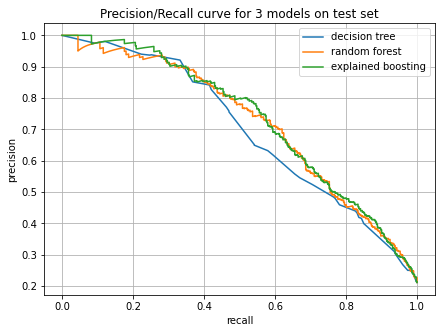

In [15]:
from sklearn.metrics import (precision_recall_curve,
                             PrecisionRecallDisplay)

f, ax = plt.subplots(figsize=(7,5))

for model_id, model in bayes_sch.items():
    
    predictions = model.best_estimator_.pipe.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, predictions)

    ax.plot(recall, precision, label=model_id)

ax.set_ylabel("precision")
ax.set_xlabel("recall")
ax.grid()
ax.legend()
ax.set_title("Precision/Recall curve for 3 models on test set")
plt.show()


In [16]:
best_model.score_details(X_test, y_test)

,accuracy_score,f1_score,precision_score,recall_score
global,0.871357,0.634286,0.795699,0.527316
Allemagne,0.823647,0.717949,0.805755,0.647399
Espagne,0.887352,0.536585,0.733333,0.423077
France,0.887310,0.581132,0.810526,0.452941
balance > 0,0.855686,0.648855,0.817308,0.537975
balance = 0,0.899301,0.590909,0.732394,0.495238


### Save model

In [17]:
from churn.config.config import save_best_params_to_yaml

save_best_params_to_yaml(path="../churn/config/latest_model.yml",
                         best_params=bayes_sch[scores.idxmax()].best_params_,
                         model_name=f"{best_model.pipe['classifier'].__class__.__name__}()")

True